<a href="https://colab.research.google.com/github/DanielaNavaGarcia/Simulacion-I/blob/main/M%C3%A9todo_de_la_transformada_inversa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

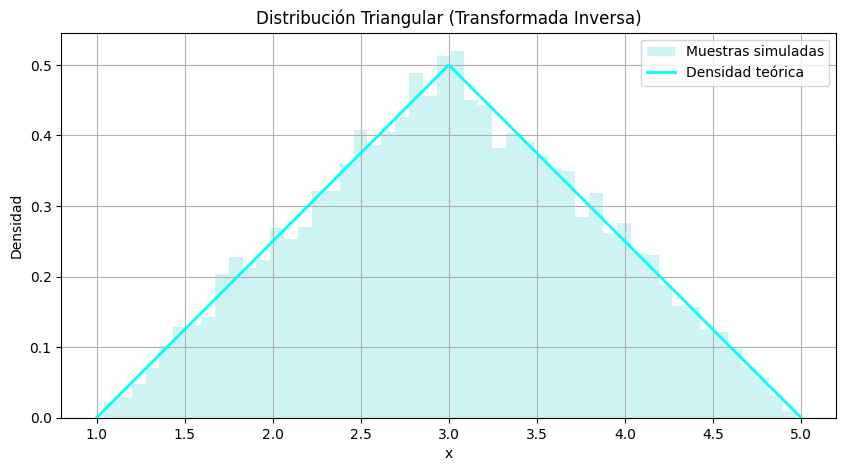

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la distribución triangular
a = 1
b = 3  # moda
c = 5
n = 10000  # número de muestras

# Función de la transformada inversa para la distribución triangular
def triangular_inverse(u, a, b, c):
    F_b = (b - a) / (c - a)
    x = np.where(
        u < F_b,
        a + np.sqrt(u * (b - a) * (c - a)),
        c - np.sqrt((1 - u) * (c - b) * (c - a))
    )
    return x

# Generar variables uniformes y aplicar la transformada inversa
u = np.random.uniform(0, 1, n)
samples = triangular_inverse(u, a, b, c)

# Graficar el histograma y la densidad teórica
x_vals = np.linspace(a, c, 1000)
pdf = np.piecewise(
    x_vals,
    [x_vals < b, x_vals >= b],
    [lambda x: 2 * (x - a) / ((b - a) * (c - a)),
     lambda x: 2 * (c - x) / ((c - b) * (c - a))]
)

plt.figure(figsize=(10, 5))
plt.hist(samples, bins=50, density=True, alpha=0.6, color='paleturquoise', label='Muestras simuladas')
plt.plot(x_vals, pdf, 'cyan', lw=2, label='Densidad teórica')
plt.title('Distribución Triangular (Transformada Inversa)')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()
